# Analyzing Disney Stock 
### Idea: 
I think that Disney stock is flying under the radar, and should be priced much higher. 

1. Disney+  
    - What differentiates Disney+ from other streaming services? Disney can use their own IP, and they have a lot of it. The brand of Disney characters/series is incredibly strong across generations. 
    
2. Technology
    - An incredibly underrated part of Disney. Robots and 360 moving treadmill are in development specifically for theme parks. But what about other possible applications and patents gained from this technology? 360 moving treadmill could be the future of VR. 


Brandon Chan 05/03/2024

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
import sklearn as sklm
from datetime import datetime 
from datetime import date
import warnings 
warnings.filterwarnings("ignore")

C:\Users\bchan\AppData\Local\Temp\ipykernel_11736\3225796608.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
disneydata = pd.read_csv("stock_csv/DIS.csv") 
disneydata['Date'] = pd.to_datetime(disneydata['Date']) 
disneydata['Date Ordinal'] = disneydata['Date'].apply(lambda x:x.toordinal()) 
disneydata 

,Date,Open,High,Low,Close,Adj Close,Volume,Date Ordinal
0,2019-05-07,135.350006,135.970001,132.759995,133.440002,131.400650,10972700,737186
1,2019-05-08,133.500000,135.699997,133.309998,134.990005,132.926956,15423500,737187
2,2019-05-09,135.029999,136.479996,132.839996,133.589996,131.548355,15297100,737188
3,2019-05-10,133.009995,134.320007,131.229996,134.039993,131.991470,9858500,737189
4,2019-05-13,131.500000,132.660004,130.550003,131.339996,129.332733,11389900,737192
...,...,...,...,...,...,...,...,...
1255,2024-05-01,111.290001,111.989998,110.209999,110.480003,110.480003,6338400,739007
1256,2024-05-02,111.430000,112.870003,110.559998,112.620003,112.620003,6799800,739008
1257,2024-05-03,113.540001,114.110001,112.800003,113.660004,113.660004,7411100,739009
1258,2024-05-06,114.800003,116.940002,114.150002,116.470001,116.470001,16245500,739012


## 5 Year Time Series 
A brief overview of the stock within the past 5 years

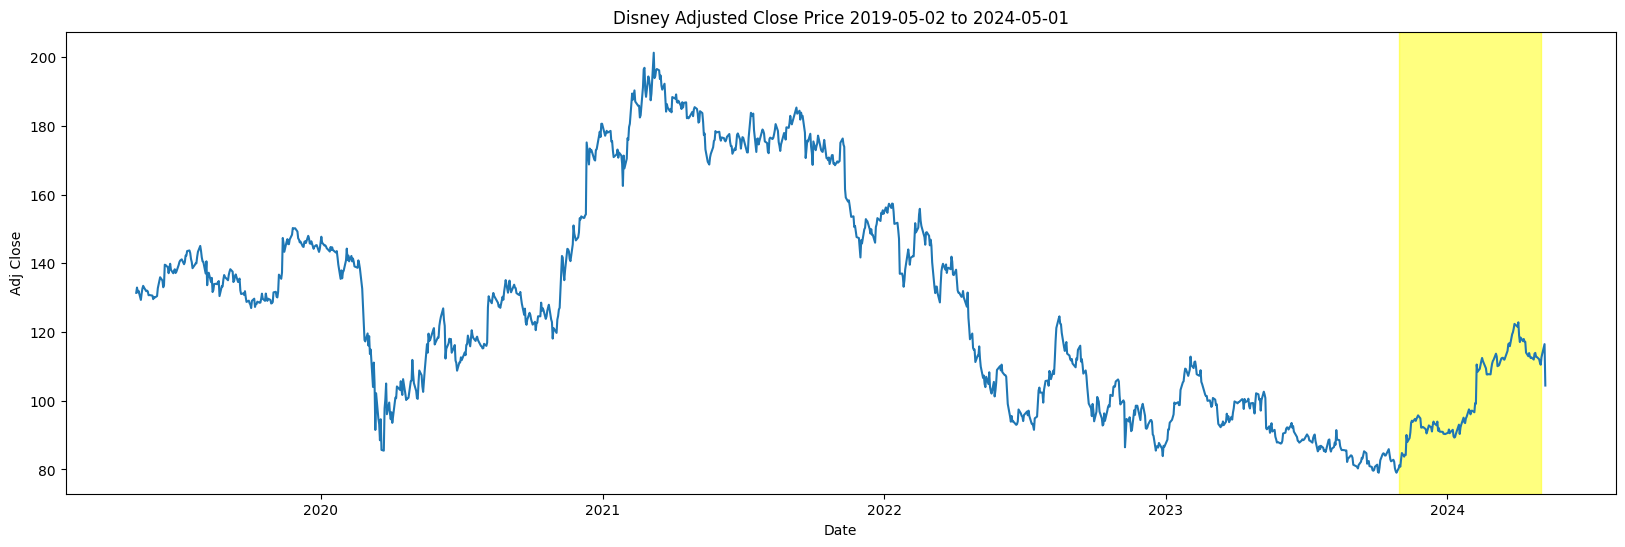

In [3]:
fig, ax = plt.subplots(figsize = (20, 6))
sns.lineplot(disneydata, x='Date', y='Adj Close') 
plt.title("Disney Adjusted Close Price 2019-05-02 to 2024-05-01") 
plt.axvspan(19660, 19845, color='yellow', alpha=0.5)
plt.show()

Although it would have been more ideal to buy back in late december or early January, I don't think it is nearly too late to invest.

##  Price Change During the Day 

Average price change during the day is $-0.07972544920634943


<function matplotlib.pyplot.show(close=None, block=None)>

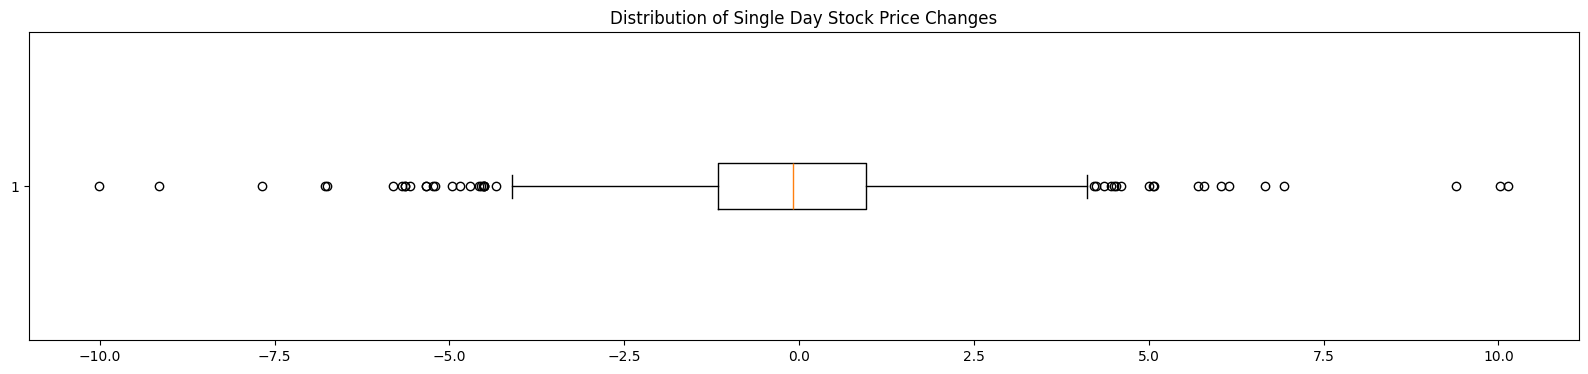

In [4]:
avg_diff = np.mean(disneydata.Close - disneydata.Open) 
print(f"Average price change during the day is ${avg_diff}") 

# Daily price change distribution 
fig, ax = plt.subplots(figsize=(20, 4))
plt.boxplot(disneydata.Close - disneydata.Open, vert = False)
plt.title("Distribution of Single Day Stock Price Changes")
plt.show


Expected daily price fluctuations within about $4, going as extreme as $10. Worth it to time well. 

## Predicting Price with Date (Linear Regression) 

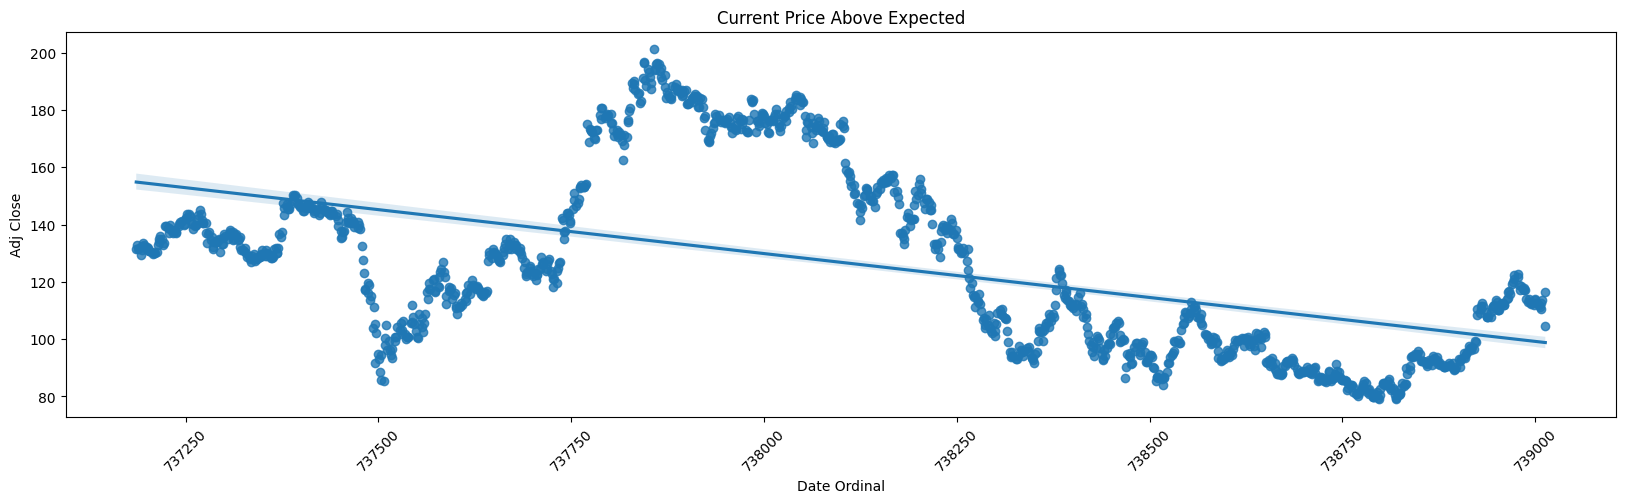

Price is $11.355793335747293 compared to expected


99.1242096642527

In [5]:
X_train, X_test, y_train, y_test = train_test_split(disneydata[['Date Ordinal']], disneydata['Adj Close'], test_size=0.1)
model = LinearRegression()
model.fit(X=X_train, y=y_train)

# Find the point on the regression line 
date_curr = datetime.now().date().toordinal()
date_curr = 739007
prediction = model.predict([[date_curr]])[0] 

fig, ax=plt.subplots(figsize=(20, 5))
sns.regplot(disneydata, x='Date Ordinal', y='Adj Close', ax=ax)
plt.xticks(rotation=45)
plt.title("Current Price Above Expected")
plt.show() 
print(f"Price is ${(disneydata[disneydata['Date Ordinal']==date_curr])['Adj Close'].values[0] - prediction} compared to expected") 
prediction


## Evaluating the Model

In [6]:
print(f"R2 = {sklm.metrics.r2_score(y_test, model.predict(X_test))}")
print(f"RMSE = {sklm.metrics.root_mean_squared_error(y_test, model.predict(X_test))}")

R2 = 0.2553227111238454
RMSE = 27.828427904023535


So the model's explained variablility and accuracy pretty low. Could consider using personal judgement over model prediction.